## Import

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Question: Among age, average glucose level, and body mass index (BMI), which factor exhibits the strongest association with the likelihood of stroke?
Benefits: First of all, these factors above are numeric variables so it's fairly to compare each others. By determining the most influential factor, healthcare professionals can tailor interventions to address the primary drivers of stroke risk.

In [31]:
df = pd.read_csv('../data/processed/processed_data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Pre-processing

In [32]:
df['heart_disease'] = df['heart_disease'].map({0:'No', 1:'Yes'}) 
df['hypertension'] = df['hypertension'].map({0:'No', 1:'Yes'}) 

### Analyzing to get the answer

Step 01: Let's look at data at first. We need to get stroke and no stroke data

In [33]:
strokes_df = df[df['stroke'] == 1]
no_strokes_df = df[df['stroke'] == 0]

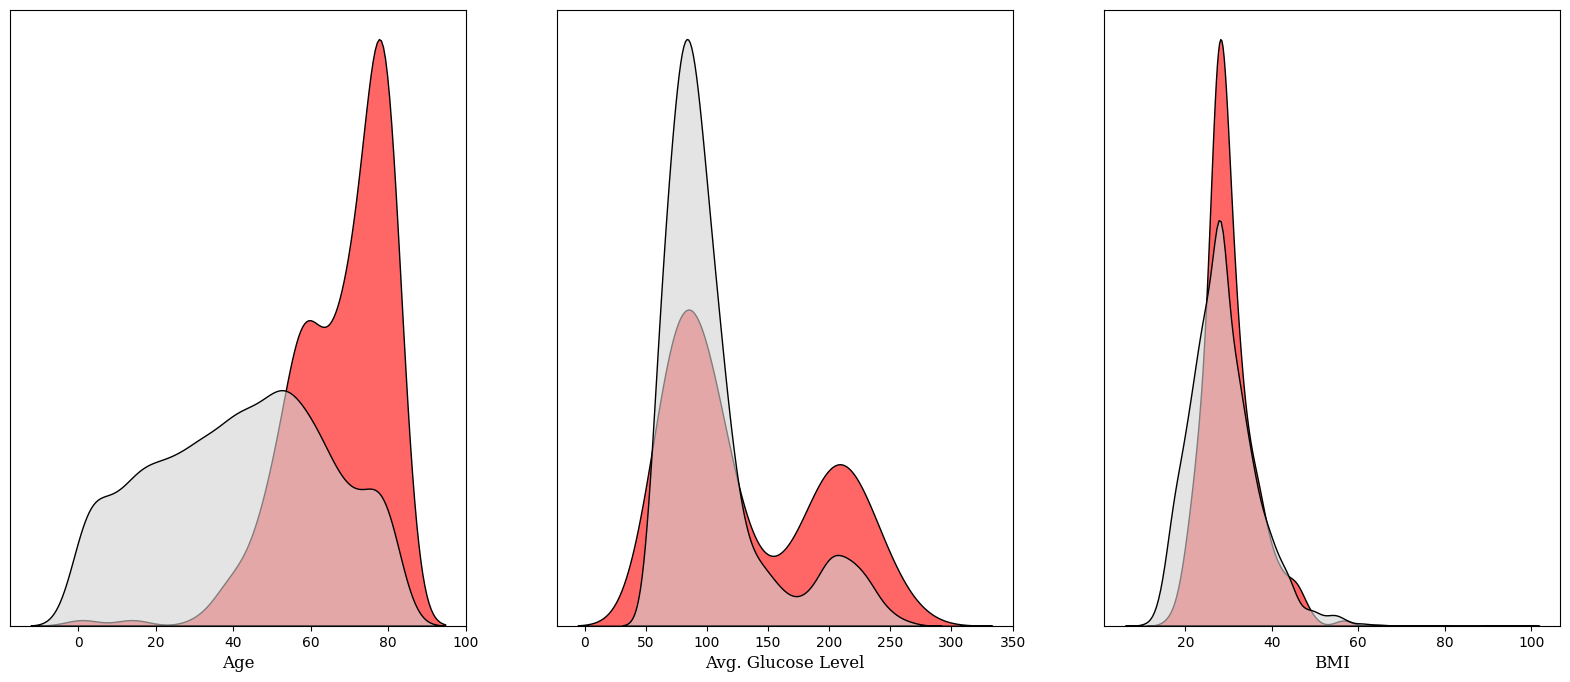

In [34]:
fig=plt.figure(figsize=(20,8),facecolor='white')
gs=fig.add_gridspec(1,3)
ax=[None for i in range(3)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[0,2])

ax[0].set_xlabel("Age",fontsize=12,fontfamily='serif')
ax[1].set_xlabel("Avg. Glucose Level",fontsize=12,fontfamily='serif')
ax[2].set_xlabel("BMI",fontsize=12,fontfamily='serif')
ax[0].get_yaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)

sns.kdeplot(x=strokes_df['age'],ax=ax[0],fill=True, color='red', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=strokes_df['avg_glucose_level'],ax=ax[1],fill=True, color='red', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=strokes_df['bmi'],ax=ax[2],fill=True, color='red', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=no_strokes_df['age'],ax=ax[0],fill=True, color='lightgrey', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=no_strokes_df['avg_glucose_level'],ax=ax[1],fill=True, color='lightgrey', alpha=0.6,zorder=3,edgecolor='black')
sns.kdeplot(x=no_strokes_df['bmi'],ax=ax[2],fill=True, color='lightgrey', alpha=0.6,zorder=3,edgecolor='black')
plt.show()

Step 02: Based on the result by plot, it can be notable that Age is the most important factor in terms of numerical factors. And we can guess the higher age, the higher risk of having stroke. So now we will explore deeper about age factor.

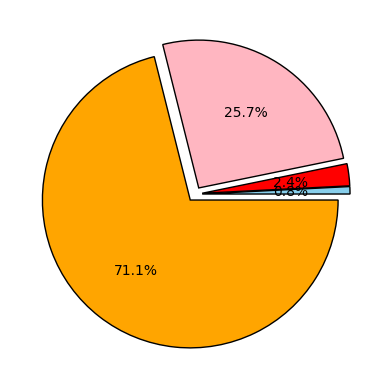

In [38]:
strokes_df['age_group'] = pd.cut(strokes_df['age'], bins=[0, 20, 40, 60, 100],labels=['0-20','20-40','40-60','60-100'])
cross_tab = pd.crosstab(strokes_df['age_group'],strokes_df['stroke'])
plt.pie(cross_tab[1], explode=[0.05, 0.05, 0.05, 0.05], 
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, colors=["skyblue", "red", "lightpink", "orange"], autopct="%1.1f%%");

Based on the result, we can find that age increase, the more likelihood to have a stroke

Step 03: Look at the result, there are 2 age groups we need to consider: Middle-aged Adults (40 - 60), Old Adults (> 60)


40 - 60 Ignore factors: heart_disease, residence_type
work_type, ever_married
60 - 100 gender: the opposite was true

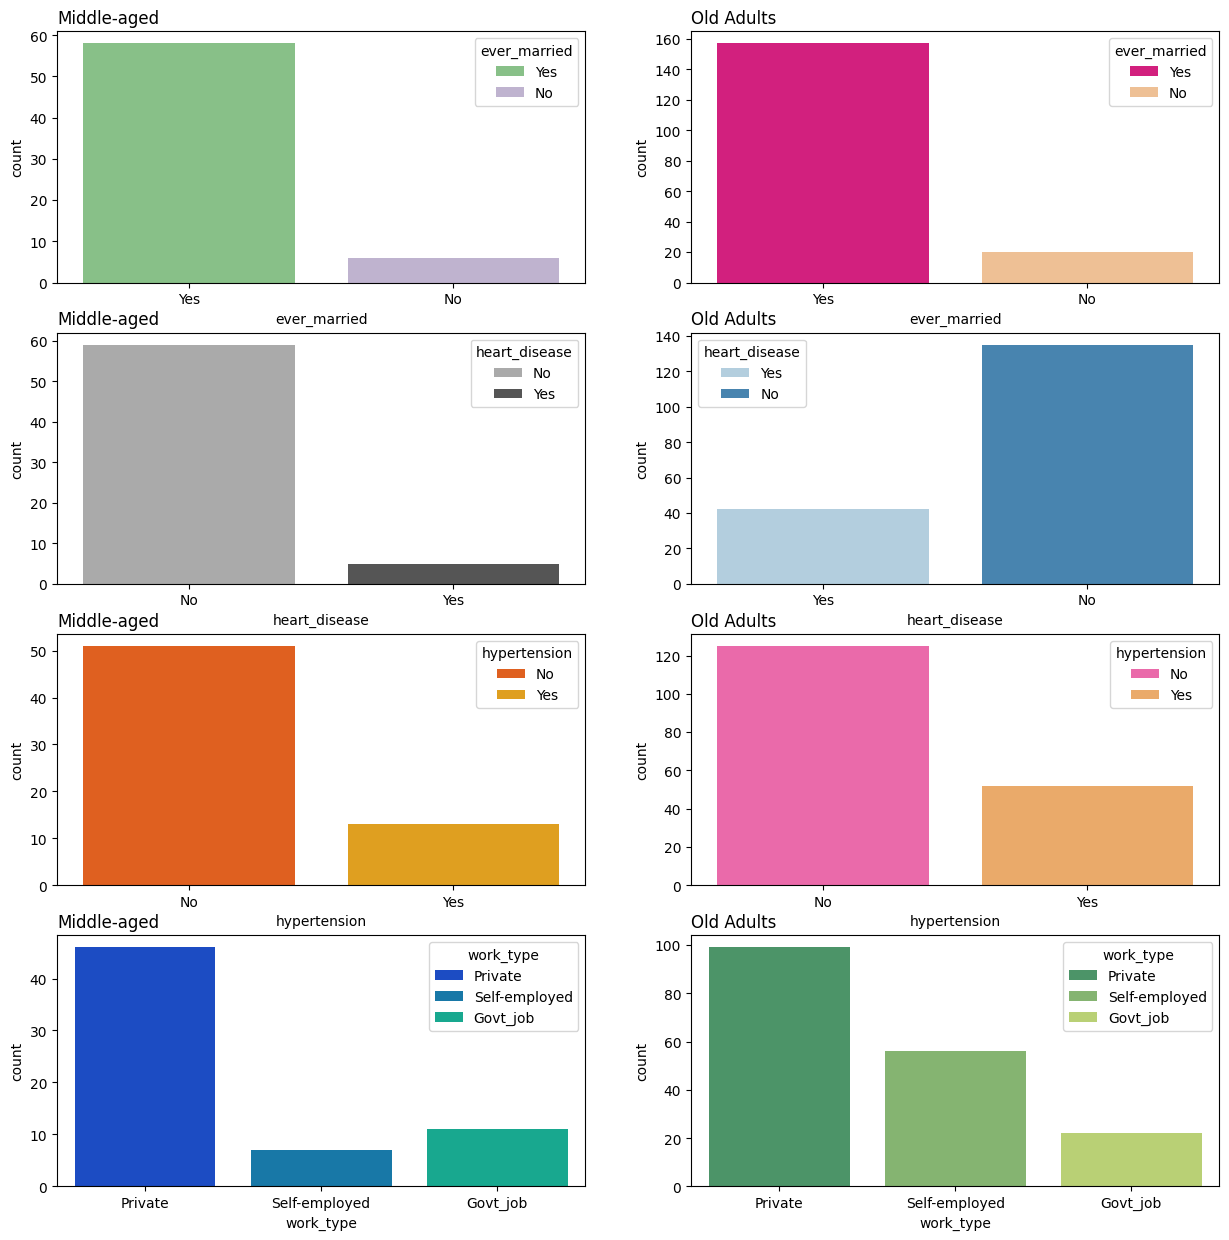

In [36]:
stroke_middle_adults = strokes_df[(strokes_df['age'] > 40) & (strokes_df['age'] <= 60)]
stroke_old_adults = strokes_df[strokes_df['age'] > 60]

col_names = ["ever_married", "heart_disease", "hypertension", "work_type"]
colors = ["Accent", "Accent_r", "binary", "Blues", "autumn", "spring", "winter", "summer"]
fig = plt.figure(figsize=(15, 15))
rows, cols = len(col_names), 2
cnt_season = 0
cnt = 1
for col in col_names:
    fig.add_subplot(rows, cols, cnt)
    plt.title("Middle-aged", loc="left")
    sns.countplot(data=stroke_middle_adults,x=col,hue=col,palette=colors[cnt-1],legend=True)
    cnt += 1
    fig.add_subplot(rows, cols, cnt)
    plt.title("Old Adults", loc="left") 
    sns.countplot(data=stroke_old_adults,x=col,hue=col,palette=colors[cnt-1],legend=True)
    cnt += 1
    cnt_season += 1
plt.show()


### Conclusion
Trong độ tuổi trung niên, phù hợp nam giới thường có nguy cơ đột quỵ nhiều hơn, nhưng điều ngược lại là sai với độ tuổi sau 60   
Không có vợ -> không bị đột quỵ   
Bệnh tim quan trọng cũng với người cao tuổi   
Cao huyết áp, 1 vấn đề đáng quan tâm, đặc biệt ở người cao tuổi   
Độ tuổi trung niên và cao tuổi đều là private, tuy nhiên self-employed ở cao tuổi thì tăng một cách đáng kể   
 